# 워드클라우드

In [6]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

## Alice in Wonderland

In [81]:
text = open('data/wc1.alice.txt').read()
alice_mask = np.array(Image.open('data/wc2.alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [82]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [83]:
len(stopwords)

193

In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

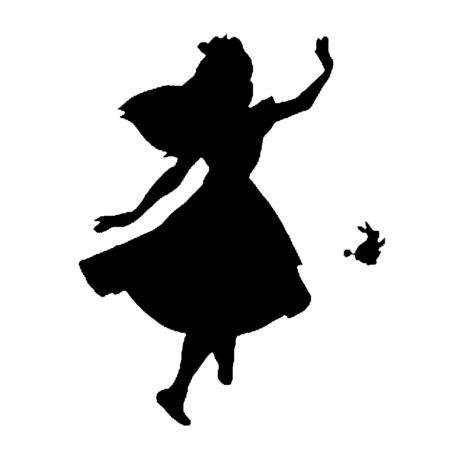

In [85]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [86]:
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ''.join([str(elem) for elem in text_])

In [87]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
            )
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'know': 0.36666666666666664,
 'Oh': 0.34444444444444444,
 'Well': 0.28888888888888886,
 'King': 0.28888888888888886,
 'Why': 0.25555555555555554,
 'thoughtAlice': 0.24444444444444444,
 'No': 0.2222222222222222,
 'However': 0.2222222222222222,
 'Hatter': 0.2222222222222222,
 'Duchess': 0.2,
 'Gryphon': 0.18888888888888888,
 'said': 0.17777777777777778,
 'Queen': 0.17777777777777778,
 'Caterpillar': 0.16666666666666666,
 'Yes': 0.14444444444444443,
 'dear': 0.14444444444444443,
 'Cat': 0.14444444444444443,
 'MockTurtle': 0.14444444444444443,
 'think': 0.1111111111111111,
 'course': 0.1111111111111111,
 'wenton': 0.1111111111111111,
 'Come': 0.1,
 'thought': 0.1,
 'Here': 0.1,
 'Ohdear': 0.08888888888888889,
 'Now': 0.08888888888888889,
 'MarchHare': 0.08888888888888889,
 'Dormouse': 0.08888888888888889,
 'Willyou you': 0.08888888888888889,
 'Mouse': 0.07777777777777778,
 'sure': 0.07777777777777778,
 'began': 0.07777777777777778,
 'First': 0.06666666666666667,
 'see': 0.0

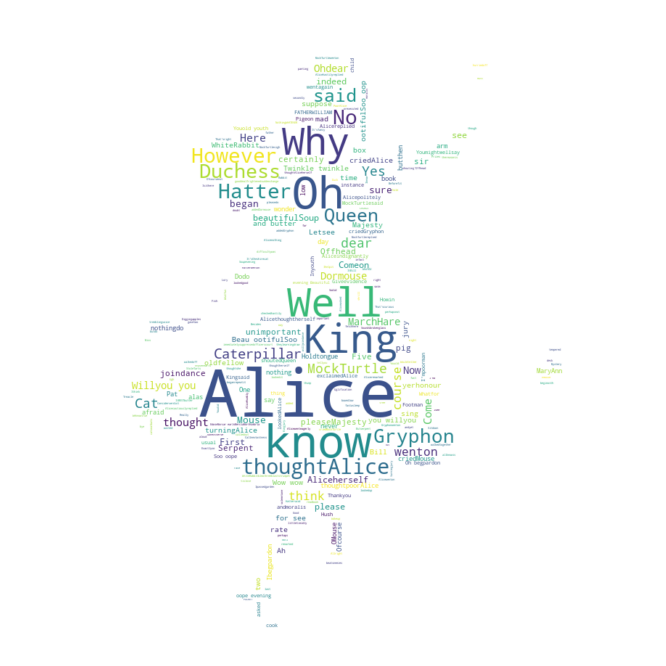

In [88]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Star Wars -A new hope

In [93]:
text = open('data/wc3.a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/wc4. stormtrooper_mask.png'))

In [94]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [95]:
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ''.join([str(elem) for elem in text_])

In [96]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [97]:
# HSL:색조(hue), 포화(saturation), 밝기(lightness)
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

In [98]:
s = 'hsl(0, 0%%, %d%%)' % random.randint(60,100)
s

'hsl(0, 0%, 66%)'

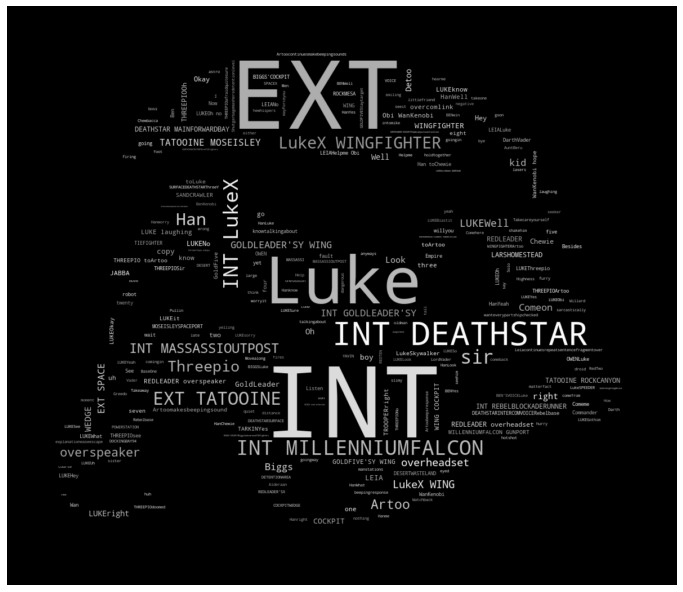

In [99]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 여자친구 선물 고르기

In [100]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [101]:
html_ = 'https://kin.naver.com/search/list.nhn?'
html = html_ + 'query={key_word}&page={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('dl')

In [102]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[:5]

['\n\n천여여친 선물 추\n\n2020.06.22.\n천여여친 선물 추  저는 조금 특별한 선물 추천 드립니다 저도 흔한 선물을 다... 특별한선물 여친선물 : DAON FLOWER [DAON FLOWER] 꽃과 향을 선물하다. DAON smartstore.... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 6\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여친선물로 뭘 줘야 할까요?\n\n2020.05.21.\n여친선물로 뭘 줘야 할까요?  안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n아빠가 어제 카드 주셔서 여친 선물\n\n2020.02.04.\n아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n정품문의 답변즘여 여친선물인데....\n\n2020.01.29.\n... 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다. 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요; \n\nQ&

In [106]:
import tqdm 

present_candi_text = []
for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        line_str = line.text.replace('\t','').replace('\n','')
        present_candi_text.append(line_str)
#        present_candi_text.append(line.text)
        
    time.sleep(0.5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [107]:
with open("data/wc6_present_candi.txt", "w", -1,'utf-8') as f:
    for line in present_candi_text:
        f.write(line+'\n')

In [108]:
len(present_candi_text)

1000

In [114]:
present_text = ''

for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [115]:
from konlpy.tag import Okt
okt = Okt()

In [116]:
tokens_ko = okt.nouns(present_text)
tokens_ko[:10]

['여자친구', '선물', '여자친구', '독립', '축하', '기념', '선물', '여자친구', '선물', '양해']

In [122]:
# Natural Language Toolkit
import nltk
gifts = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(gifts.tokens))
print(len(set(gifts.tokens)))

25751
704


In [123]:
gifts.vocab().most_common(100)

[('선물', 3025),
 ('여자친구', 2952),
 ('목걸이', 2607),
 ('수', 2005),
 ('추천', 1956),
 ('답변', 1033),
 ('때', 878),
 ('중', 865),
 ('용', 865),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 495),
 ('결혼', 358),
 ('고민', 297),
 ('상담', 135),
 ('이성', 133),
 ('쥬니버', 132),
 ('네이버', 127),
 ('용법', 127),
 ('가족', 93),
 ('이벤트', 93),
 ('행사', 90),
 ('중학생', 74),
 ('초', 72),
 ('내공', 72),
 ('고', 72),
 ('문구', 71),
 ('만년필', 69),
 ('미술', 69),
 ('용품', 69),
 ('좀', 46),
 ('제', 41),
 ('화장품', 34),
 ('뭐', 33),
 ('생각', 27),
 ('여자', 23),
 ('생일', 22),
 ('지갑', 22),
 ('화이트데이', 21),
 ('걸', 20),
 ('요', 20),
 ('저', 19),
 ('향수', 17),
 ('것', 16),
 ('가격', 16),
 ('크리스마스', 16),
 ('거', 15),
 ('이번', 15),
 ('커플', 14),
 ('로', 13),
 ('질문', 13),
 ('뭘', 12),
 ('게', 11),
 ('꽃', 11),
 ('반지', 11),
 ('감동', 10),
 ('가방', 10),
 ('살', 10),
 ('쇼핑', 10),
 ('브랜드', 9),
 ('기념일', 9),
 ('진짜', 9),
 ('의미', 9),
 ('곧', 9),
 ('정도', 9),
 ('전', 9),
 ('목도리', 9),
 ('중반', 8),
 ('친구', 8),
 ('카드', 8),
 ('이제', 8),
 ('팔찌', 8)

In [130]:
sw_text = ' '.join([str(elem) for elem in set(gifts.tokens)])
print(sw_text)

중반 문제 기분 등 제대로 말 집업 만 편도 케이스 저가 영구 여성 게이 밥 예비 건 반 저번 하트 보증 가성 선물 마디 해주시 럼 졸업식 무엇 화장품 초콜렛 차라리 축하 광장 상품 종류 색 빵 그랜피 백화점 정해 루미 링 순간 떄 네이션 것 메모리 레몬 지식인 드림 금 곳 중지 가지 티나 하여튼 화이트데이 최대 화장 주문 워터 산물 펄찌 서여 커플 지방선거 작업 크롬 빼 요 셀 김 며칠 쇼 그룹 값 원데이 질문 쇼핑 아이디어 제 풍속 머 캠코더 맛 구피 러브레터 가게 아이템 살껀데 해주 티니 메트로 포에버 고수 글 로즈데이 가방 놀이 꽃집 치 언제 노트북 달달 커플티 계획 신발 상자 뭐 일 저기 무스 홀로 스팅 사주면 날씨 섬유 제격 루나 길찾기 로 에센스 거도 살이 매 처럼 벨벳 음식 팔찌 네이버 인터넷 고향 체크 손편지 대학 피어싱 독립 렐라 이어폰 타이밍 저 철 패션 윈도우 찬 발렌타인 걸 중후 정도 덕후 명품 슬 무난 생로랑 이내 컬러 원래 셜 주니 암거 리스트 우편 제일 블랙베리 센스 도움 언니 친한친구 한번 가발 때매 만년필 대해 잡화 도대체 코튼 동안 한지 제품 초등학교 이름 박 로션 진주 시계 맥 사업자 마음 거 손가락 수제 데이트 때문 세트 리버 상큼 커플링 금함 둿 앤북 애 포니테일 틴트 정식 스카프 욕설 등등 스탠드 반나절 빼빼로데이 잉크 적 친구 지금 연애 그동안 함 사람과 주류 청계 애니메이션 고급 해 시구 블루투스 존경 취업 퍼온거 유얼 한편 플립 영화 구 파운데이션 용도 체형 강추 뒤 꼭 일찍 고생 실버 사서 거의 포장 피부 적극 가디건 달 봣 다시 친 그게 초콜릿 이중 기념 색상 손바닥 조금 점 목 시간 편지 초딩 우선 별로 위 여자친구 토 향 음향 핸드 파티 추천 아이폰 사실 초 거리 조언 건즈더듀얼 날 중국 정 처음 규어 오빠 기초 만들기 전화 지역 무료 드림캐쳐 오락 비타민 전역 발렌타인데이 추억 남성 디올 취미 그것 대비 서울 자주 학기 천연 좀 최고 루이비통 메이크업 생각 공주 병영 류량 직업 백 스킨 정성 거나 홍 쥬얼

In [131]:
sw_text = '''별로 생일 반 직업 고생 취미 도대체 군대 쪼금 여친 재료 곳 
 만원 인 성인 사업자 한번 전여자친구 전 확인 리얼 연상연하 햇빛 후 풍속
 애 럼 괸찮치만 한민 언제 하여튼 동안 자주 호가 살이 겟잇뷰티 데이트 
 저 머 실용 전역 욕설 정도 매 둿 슬 연인 통화 먼저 음 줄 만들기 살껀데
  비밀연애 가을 무슨 게이 포함 때 컬러 로 섬유 손바닥 브랜드 준비 크게
  드림 성의 팟 블랙 자 하니 고 가성 점점 대학생 제대로 셀 윈도우 
  쪽 방학 공주 구류 아이디어 의식 사서 최근 남성 여자 주위 음질 신발
  미만 중후 현재 중고 피 정성 제격 산물 시티 신경 중지 요 독립 사이트
  겸 매일 반나절 용도 중국 서울 퍼온거 이 얼마 바 완전 그것 의견 일찍
  센스 일 점 청계 맛 조언 좀 검 기념 지역 고수 오빠 전부 초반 네이버
  상큼 순간 당장 기 최대 연애 축하 부담 추억 고해 고급 안 은행 빼빼로데이
  벌써 교환학생 타이밍 만 스 신고 다시 결혼 리스트 하루 해도 친구 용 티
  시내 그룹 거의 강남 의미 개 대면 시간 사양 용산 병영 셜 건 기초 수제
  보증 실버 움 진 사려 방송 친 가격 뒤 선물 잡화 우편 기타 여러가지 토 거
  화이트데이 얘기 결과 예상 기도 이직 둘 은근 말씀 명절 날 백화점 해주시
  주년 참고 대학 쭈니 달 장미 대요 고향 준 용법 지방선거 나중 거도 군 말
  오늘 값 빼 사주면 꿈 선 생각 봣 게 대해 후반 작업 가장 교통 이벤트 찬
  아래 잡고 일주일 꼭 이자 얼굴 치 번 도움 수수 남자 사람과 여자친구 날씨
  소개 마음 뭘 막상 친한친구 질문 초딩 용품 양산 힘 저녁 일단 졸업식
  제일 리버 첫 해 려고 를 주니 상품 수 다음 감동 행사 비 부 크리스마스
  계절 편도 문제 채팅 상담 인기 직접 그동안 중 기억 마디 상자 원래 종류
  분 박 밥 동갑 관리 색상 철 행정 연락 메모리 이제 덕후 무협 가요 하트
  저가 제주도 달달 답변 쥬니버 다음주 파티 초등학생 연말 탈취 때문 학교생활
  저번 부분 진주 해주 누가 베스트 접 정말 정해 요즘 여름 버스 내공 한지
  때매 목 대도 길찾기 기념일 곧 종합 광장 제 모델 뭐 가기 활용 안나 빨강
  양해 원데이 데 강추 루 홀로 외 차라리 네 의류 학기 티셔츠 주 학년 색깔
  손가락 피부 살 언니 땜 중학생 이성 처음 님들 부모님 혹시 제외 건강 생활
  소나기 추천 우정 미리 등 광역 더 떄 왜 택배 예비 고요 백 금함 중반 조금
  며칠 이요 이번 겨울 라면 끼 항상 송이 고민 전화 테크 함 액션 저기 기분
  무엇 고삼 주문 처럼 홍 커플 거리 용인 브드 체크 오락 팩트 여행 그냥
  쇼핑 포장 그 체형 전문 졸업 내내 지식인 근방 확행 정식 핸드 부탁 초등학교
  그게 현금 회사 한편 경우 이하 가족 이중 학생 어쨌든 대충 여성 화장 영상
  영구 발렌타인 너 하루하루 최고 꽃집 지금 토닥토닥 세트 이틀 사람 걸
  볶음 제품 코미디 모두 하나 사랑 사실 지식 놀이 등등 발렌타인데이 진짜
  플립 데이 적극 민원 재회 존경 시구 무료 행동 고등학교 대비 인터넷 서여
  립스틱 위 나이 김 쇼 글구 구 무난 것 색 성분  일주년 메이커 다른 우선
  정 여동생 계획 서도 이름 거나 맥 입문 또 이내 발레 여의 취업 중동 가게
  이면 전후 고등학생 초소 적 메세지 괜찬을듯해'''

In [132]:
stop_words = sw_text.split()

In [134]:
#Stopwords 제거
text_ = [gift for gift in gifts if gift not in stop_words]

In [135]:
gifts = nltk.Text(text_, name='여자 친구 선물')
gifts.vocab().most_common(50)

[('목걸이', 2607),
 ('다이아', 859),
 ('티니', 859),
 ('초', 72),
 ('문구', 71),
 ('만년필', 69),
 ('미술', 69),
 ('화장품', 34),
 ('지갑', 22),
 ('향수', 17),
 ('꽃', 11),
 ('반지', 11),
 ('가방', 10),
 ('목도리', 9),
 ('카드', 8),
 ('팔찌', 8),
 ('귀걸이', 7),
 ('펜던트', 6),
 ('케이스', 6),
 ('손편지', 6),
 ('명품', 6),
 ('편지', 6),
 ('옷', 5),
 ('초콜릿', 5),
 ('패션', 5),
 ('투맨', 5),
 ('틴트', 5),
 ('노트북', 5),
 ('전자담배', 4),
 ('글', 4),
 ('속옷', 4),
 ('톰', 4),
 ('크롬', 4),
 ('이어폰', 4),
 ('공예', 4),
 ('루이비통', 4),
 ('하카', 3),
 ('시계', 3),
 ('다이어트', 3),
 ('루이까또즈', 3),
 ('벨트', 3),
 ('넥타이', 3),
 ('폰', 3),
 ('가죽', 3),
 ('레이스', 3),
 ('다담', 3),
 ('워터', 3),
 ('피어싱', 3),
 ('류량', 3),
 ('로즈데이', 2)]

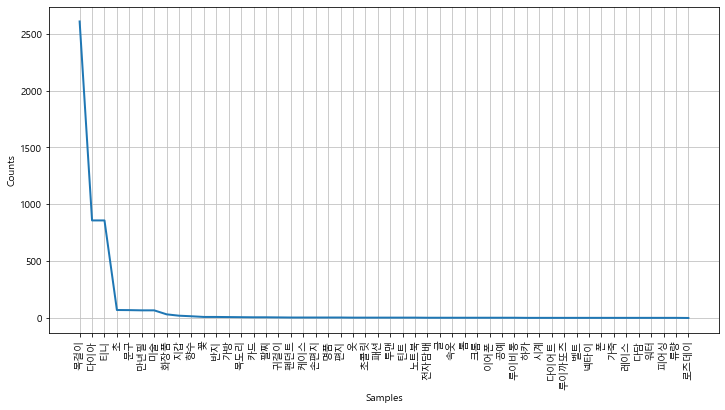

In [136]:
plt.figure(figsize=(12,6))
gifts.plot(50) 
plt.show()

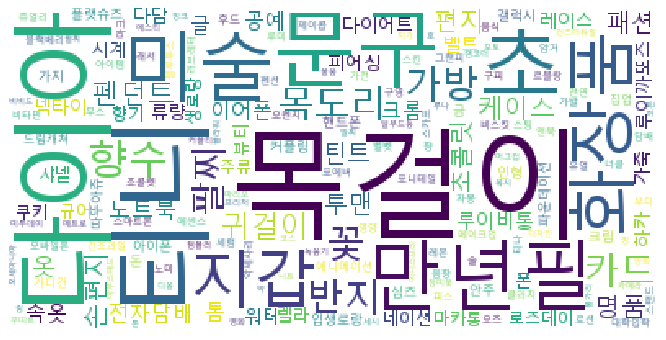

In [137]:
data = gifts.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [138]:
mask = np.array(Image.open('data/wc5.heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [140]:
data = gifts.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

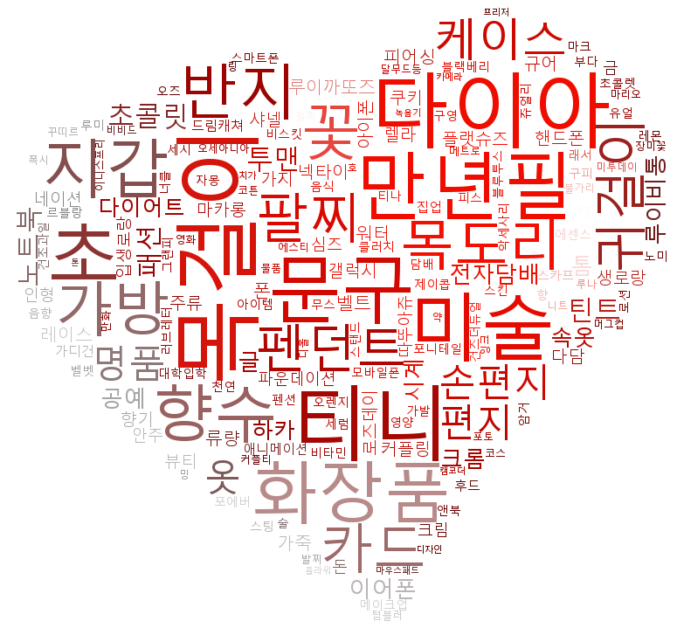

In [141]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()